In [1]:
from WPI_SCA_LIBRARY.CWScope import *
from WPI_SCA_LIBRARY.FileFormat import *
from WPI_SCA_LIBRARY.DPA import *
from WPI_SCA_LIBRARY.LeakageModels import *
from WPI_SCA_LIBRARY.Metrics import *
from ipywidgets import interact

In [2]:
fp = FileParent("Testfile2", ".", False)
scope = CWScope("../../../hardware/victims/firmware/simpleserial-aes/simpleserial-aes-CWLITEARM.hex", target_type=cw.targets.SimpleSerial2)
#known key: 2b 7e 15 16 28 ae d2 a6 ab f7 15 88 09 cf 4f 3c

OSError: Unable to communicate with found ChipWhisperer. Check that 
another process isn't connected to it and that you have permission to communicate with it.

In [6]:
scope.cw_to_file_framework(2500, fp, "Exp1")

Capturing 2500 Traces: 100%|██████████| 2500/2500 [01:20<00:00, 31.04it/s]


In [9]:
my_plaintext = fp.get_experiment("Exp1").get_dataset("cw_capture_plaintexts").read_all()
my_guesses = fp.get_experiment("Exp1").get_dataset("cw_capture_keys").read_all()
my_traces = fp.get_experiment("Exp1").get_dataset("cw_capture_traces").read_all()

256it [00:50,  5.12it/s]


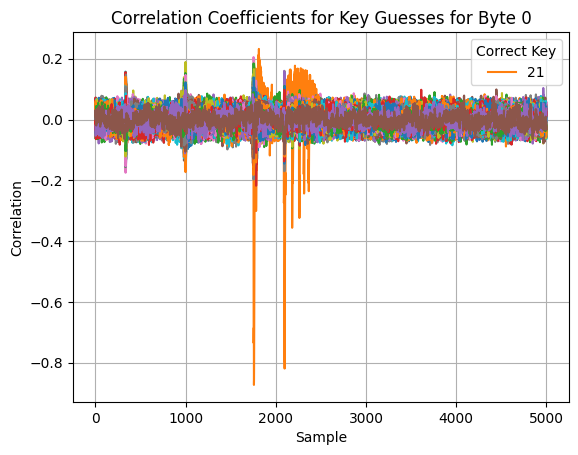

[  43  126   21   22   40  -82  -46  -90  -85   -9   21 -120    9  -49
   79   60]


In [18]:
for k in range(0, 256):        
    leakage = leakage_model_hamming_weight(num_traces=2500, plaintexts=my_plaintext, subkey_guess=k, target_byte=10)
    correlation = pearson_correlation(leakage, my_traces)
    if k == 21:
        plt.plot(correlation, label=k)
    else:
        plt.plot(correlation)
plt.legend(title="Correct Key")
plt.title("Correlation Coefficients for Key Guesses for Byte 10")
plt.xlabel("Sample")
plt.ylabel("Correlation")
plt.grid()
plt.show()

print(my_keys[0])

In [21]:
key_ranks = np.empty(256, dtype=object)
key_scores = np.empty(256, dtype=object)
key_candidates = range(256)
for i in range(16):
    ranks_scores = score_and_rank(key_candidates, i, my_traces, score_with_correlation, my_plaintext, leakage_model_hamming_weight)
    print("Highest Ranked Key Guess: {} with score {}".format(ranks_scores[0][0], ranks_scores[0][1]))

Highest Ranked Key Guess: 43 with score 0.8812207053909576
Highest Ranked Key Guess: 126 with score 0.8686526617373338
Highest Ranked Key Guess: 21 with score 0.8871260459360242
Highest Ranked Key Guess: 22 with score 0.8836959615905439
Highest Ranked Key Guess: 40 with score 0.8682423015193661
Highest Ranked Key Guess: 174 with score 0.8769161006781178
Highest Ranked Key Guess: 210 with score 0.8810044829667103
Highest Ranked Key Guess: 166 with score 0.8663266748223291
Highest Ranked Key Guess: 171 with score 0.8605083546133262
Highest Ranked Key Guess: 247 with score 0.8532096427984253
Highest Ranked Key Guess: 21 with score 0.8728704021741188
Highest Ranked Key Guess: 136 with score 0.8747420150068678
Highest Ranked Key Guess: 9 with score 0.864625940891426
Highest Ranked Key Guess: 207 with score 0.8485722186332029
Highest Ranked Key Guess: 79 with score 0.878868359477768
Highest Ranked Key Guess: 60 with score 0.8635813825278705
